# RSSI Data Analysis

In [1]:
import json
from collections import defaultdict
import datetime as dt
import matplotlib.pyplot as plt
import math

In [2]:
file_path = 'rssi_data_ccl.json'

def load_rssi_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = file.read()
        
        # Try fixing common JSON issues (e.g., trailing commas)
        try:
            data = json.loads(raw_data)
        except json.JSONDecodeError as e:
            print(f"JSON error: {e}. Attempting to clean the JSON file...")
            # Clean and re-try (fix trailing commas, invalid characters, etc.)
            cleaned_data = raw_data.replace(',]', ']').replace(',}', '}')
            data = json.loads(cleaned_data)
    
    return data

def analyze_rssi_data(data):
    total_records = len(data)
    ssid_count = defaultdict(list)  # Dictionary to store RSSI values per SSID
    
    for record in data:
        timestamp = record.get('timestamp')
        ssid = record.get('ssid')
        rssi = record.get('rssi')

        if ssid and rssi:
            ssid_count[ssid].append((timestamp, rssi))

    ssid_averages = {}
    for ssid, rssi_data in ssid_count.items():
        rssi_values = [rssi for _, rssi in rssi_data]
        average_rssi = sum(rssi_values) / len(rssi_values)
        ssid_averages[ssid] = average_rssi

    strongest_ssid = max(ssid_averages, key=ssid_averages.get)
    weakest_ssid = min(ssid_averages, key=ssid_averages.get)

    print(f"Total RSSI Records: {total_records}")
    print(f"Strongest SSID: {strongest_ssid} with average RSSI {ssid_averages[strongest_ssid]}")
    print(f"Weakest SSID: {weakest_ssid} with average RSSI {ssid_averages[weakest_ssid]}")

    return ssid_count, ssid_averages

rssi_data = load_rssi_data(file_path)
ssid_count, ssid_averages = analyze_rssi_data(rssi_data)

Total RSSI Records: 185885
Strongest SSID: Cosy Cup Library Guest with average RSSI -41.95367434165173
Weakest SSID: Smartphone_connect_ca2000 with average RSSI -98.0


### Plotting RSSI values over time for the top N SSIDs by average RSSI

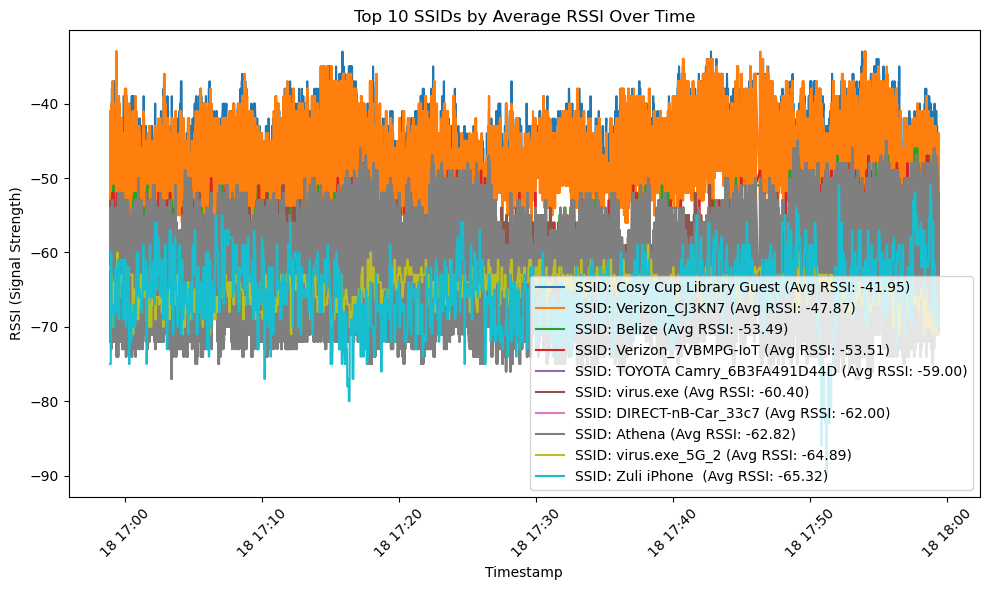

In [3]:
def plot_top_n_rssi_over_time(ssid_count, ssid_averages, top_n=10):
    # Sort SSIDs by average RSSI
    top_n_ssids = sorted(ssid_averages, key=ssid_averages.get, reverse=True)[:top_n]

    # Plot RSSI values over time for top N SSIDs
    plt.figure(figsize=(10, 6))
    
    for ssid in top_n_ssids:
        rssi_data = ssid_count[ssid]
        timestamps = [dt.datetime.strptime(t, '%Y-%m-%d %H:%M:%S') for t, _ in rssi_data]
        rssi_values = [rssi for _, rssi in rssi_data]
        
        plt.plot(timestamps, rssi_values, label=f"SSID: {ssid} (Avg RSSI: {ssid_averages[ssid]:.2f})")
    
    plt.xlabel('Timestamp')
    plt.ylabel('RSSI (Signal Strength)')
    plt.title(f'Top {top_n} SSIDs by Average RSSI Over Time')
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot RSSI signal strength over time for the top 10 SSIDs
plot_top_n_rssi_over_time(ssid_count, ssid_averages, top_n=10)


### Plotting subplots for each SSID

C:\Users\pinal\AppData\Local\Temp\ipykernel_25592\653837103.py:21: UserWarning: Glyph 128 (\x80) missing from current font.
  plt.tight_layout()
C:\Users\pinal\AppData\Local\Temp\ipykernel_25592\653837103.py:21: UserWarning: Glyph 153 (\x99) missing from current font.
  plt.tight_layout()
C:\Users\pinal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pinal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


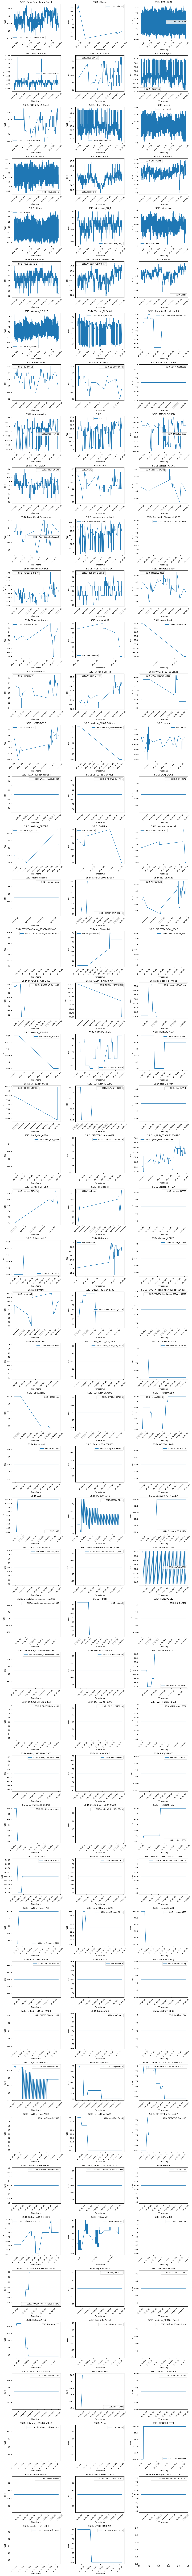

In [4]:
def plot_rssi_subplots(ssid_count):
    total_ssids = len(ssid_count)
    cols = 3  # Set number of columns in the grid
    rows = math.ceil(total_ssids / cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
    axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array
    
    for i, (ssid, rssi_data) in enumerate(ssid_count.items()):
        timestamps = [dt.datetime.strptime(t, '%Y-%m-%d %H:%M:%S') for t, _ in rssi_data]
        rssi_values = [rssi for _, rssi in rssi_data]
        
        axes[i].plot(timestamps, rssi_values, label=f"SSID: {ssid}")
        axes[i].set_title(f"SSID: {ssid}")
        axes[i].set_xlabel('Timestamp')
        axes[i].set_ylabel('RSSI')
        axes[i].legend()
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

plot_rssi_subplots(ssid_count)